In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("aug_train.csv")

In [3]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
df.corr().sort_values(by="target")

,enrollee_id,city_development_index,training_hours,target
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
enrollee_id,1.000000,-0.040455,0.000998,0.049475
target,0.049475,-0.341665,-0.021577,1.000000


In [6]:
abs(df.corr()).sort_values(by="target")

,enrollee_id,city_development_index,training_hours,target
training_hours,0.000998,0.001920,1.000000,0.021577
enrollee_id,1.000000,0.040455,0.000998,0.049475
city_development_index,0.040455,1.000000,0.001920,0.341665
target,0.049475,0.341665,0.021577,1.000000


<AxesSubplot:>

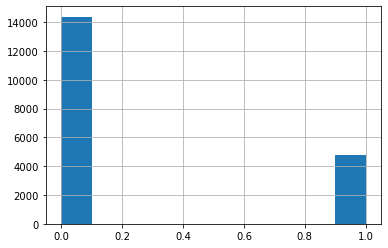

In [7]:
df["target"].hist()

In [8]:
df["target"].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [9]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [10]:
df['gender'] = df['gender'].fillna((df['gender'].mean()))
df['enrolled_university'] = df['enrolled_university'].fillna((df['enrolled_university'].mean()))
df['major_discipline'] = df['major_discipline'].fillna((df['major_discipline'].mean()))
df['company_size'] = df['company_size'].fillna((df['company_size'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))

df

TypeError: can only concatenate str (not "int") to str

In [11]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)
df['city'] = df['city'].apply(city)

df

NameError: name 'gender_to_numeric' is not defined

In [12]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5
    
def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122
    
    

In [13]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)
df['city'] = df['city'].apply(city)

df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,11561,2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0.0,0.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,0,0.920,1.0,1,0.0,0.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,0,0.920,1.0,1,0.0,0.0,0.0,21.0,5.0,0.0,4.0,44,0.0
19156,5756,33,0.802,1.0,1,0.0,2.0,NaN,0.0,6.0,0.0,2.0,97,0.0


In [14]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [15]:
df['gender'] = df['gender'].fillna((df['gender'].mean()))
df['enrolled_university'] = df['enrolled_university'].fillna((df['enrolled_university'].mean()))
df['major_discipline'] = df['major_discipline'].fillna((df['major_discipline'].mean()))
df['company_size'] = df['company_size'].fillna((df['company_size'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))

df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [16]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level            True
major_discipline          False
experience                 True
company_size              False
company_type              False
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [17]:
df


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [18]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level            True
major_discipline          False
experience                 True
company_size              False
company_type              False
last_new_job               True
training_hours            False
target                    False
dtype: bool

In [19]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.rename(columns={0:'Number of null values'})
df_null['Percentage null values'] = round(df.isnull().sum()/train. enrollee_id.count()*100,2)
df_null

NameError: name 'train' is not defined

In [20]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.rename(columns={0:'Number of null values'})
df_null['Percentage null values'] = round(df.isnull().sum()/df. enrollee_id.count()*100,2)
df_null

,Number of null values,Percentage null values
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,0,0.00
relevent_experience,0,0.00
enrolled_university,0,0.00
education_level,460,2.40
major_discipline,0,0.00
experience,65,0.34
company_size,0,0.00


In [21]:
df = df.dropna(axis=0)

In [22]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool

In [23]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [24]:
df.describe()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000,18280.000000
mean,16925.597374,17.978446,0.830751,1.072566,0.730197,0.322877,0.579376,0.344524,10.238512,3.279584,0.687755,2.016685,65.386324,0.246991
std,9655.212365,22.818564,0.122474,0.269641,0.443870,0.584081,0.886799,0.993402,6.756453,1.633411,1.187176,1.672841,60.049089,0.431273
min,1.000000,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8567.250000,2.000000,0.743000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,1.000000,23.000000,0.000000
50%,17043.500000,9.000000,0.910000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,3.274660,0.000000,1.000000,47.000000,0.000000
75%,25327.750000,25.000000,0.920000,1.071468,1.000000,1.000000,1.000000,0.000000,16.000000,4.000000,0.690966,3.000000,88.000000,0.000000
max,33380.000000,122.000000,0.949000,2.000000,1.000000,2.000000,4.000000,5.000000,21.000000,7.000000,5.000000,5.000000,336.000000,1.000000


In [25]:
abs(df.corr()).sort_values(by="target")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
company_size,0.006113,0.044135,0.029750,0.007463,0.002290,0.022449,0.008301,0.017859,0.033170,1.000000,0.035861,0.036079,0.004760,0.002954
gender,0.005576,0.033716,0.002993,1.000000,0.011760,0.017724,0.020580,0.050318,0.049083,0.007463,0.046223,0.015017,0.003166,0.015012
major_discipline,0.027369,0.029373,0.080673,0.050318,0.055662,0.050763,0.006291,1.000000,0.009295,0.017859,0.032447,0.017812,0.002543,0.015401
company_type,0.006132,0.002152,0.038020,0.046223,0.121554,0.078865,0.065639,0.032447,0.030126,0.035861,1.000000,0.020940,0.000181,0.016697
training_hours,0.000436,0.004343,0.002364,0.003166,0.015208,0.002111,0.001741,0.002543,0.002678,0.004760,0.000181,0.004666,1.000000,0.021546
enrollee_id,1.000000,0.019984,0.042182,0.005576,0.047781,0.035876,0.022224,0.027369,0.038187,0.006113,0.006132,0.032501,0.000436,0.050557
city,0.019984,1.000000,0.184454,0.033716,0.033906,0.076904,0.059763,0.029373,0.057761,0.044135,0.002152,0.055199,0.004343,0.058775
last_new_job,0.032501,0.055199,0.189714,0.015017,0.235791,0.185229,0.094545,0.017812,0.475897,0.036079,0.020940,1.000000,0.004666,0.086320
education_level,0.022224,0.059763,0.066876,0.020580,0.232037,0.023276,1.000000,0.006291,0.040632,0.008301,0.065639,0.094545,0.001741,0.090387
enrolled_university,0.035876,0.076904,0.126724,0.017724,0.280437,1.000000,0.023276,0.050763,0.286677,0.022449,0.078865,0.185229,0.002111,0.102080


<AxesSubplot:>

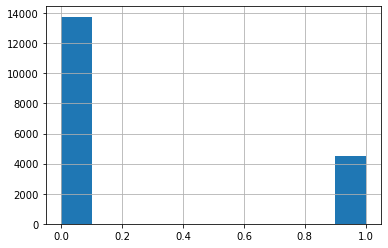

In [26]:
df["target"].hist()

In [27]:
df["target"].value_counts()

0.0    13765
1.0     4515
Name: target, dtype: int64

In [28]:
X = df.drop("target", axis=1) 

In [29]:
X

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97


In [30]:
y = df["target"]

In [31]:
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 18280, dtype: float64

In [32]:
df_test = pd.read_csv("aug_test.csv")

In [33]:
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [34]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [35]:
df_test['gender'] = df_test['gender'].apply(gender_to_numeric)
df_test['relevent_experience'] = df_test['relevent_experience'].apply(rel_experience)
df_test['enrolled_university'] = df_test['enrolled_university'].apply(enrollment)
df_test['education_level'] = df_test['education_level'].apply(edu_level)
df_test['major_discipline'] = df_test['major_discipline'].apply(major)
df_test['experience'] = df_test['experience'].apply(experience)
df_test['company_type'] = df_test['company_type'].apply(company_t)
df_test['company_size'] = df_test['company_size'].apply(company_s)
df_test['last_new_job'] = df_test['last_new_job'].apply(last_job)
df_test['city'] = df_test['city'].apply(city)

df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1.0,0.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,0,0.920,2.0,1,0.0,0.0,0.0,5.0,NaN,0.0,1.0,98
2,31806,2,0.624,1.0,0,0.0,2.0,NaN,0.0,NaN,0.0,0.0,15
3,27385,10,0.827,1.0,1,0.0,1.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,0,0.920,1.0,1,0.0,0.0,0.0,21.0,4.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0.0,0.0,3.0,16.0,NaN,4.0,4.0,15
2125,195,36,0.897,1.0,1,0.0,1.0,0.0,18.0,NaN,NaN,2.0,30
2126,31762,14,0.887,1.0,0,0.0,4.0,NaN,3.0,NaN,0.0,0.0,18
2127,7873,12,0.804,1.0,1,1.0,2.0,NaN,7.0,2.0,4.0,1.0,84


In [36]:
df_test.isnull.any()

AttributeError: 'function' object has no attribute 'any'

In [37]:
df_test.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
dtype: bool

In [38]:
df_null = pd.DataFrame(df_test.isnull().sum())
df_null = df_null.rename(columns={0:'Number of null values'})
df_null['Percentage null values'] = round(df_test.isnull().sum()/df_test. enrollee_id.count()*100,2)
df_null

,Number of null values,Percentage null values
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,508,23.86
relevent_experience,0,0.00
enrolled_university,31,1.46
education_level,52,2.44
major_discipline,312,14.65
experience,5,0.23
company_size,622,29.22


In [39]:
df_test['gender'] = df_test['gender'].fillna((df_test['gender'].mean()))
df_test['enrolled_university'] = df_test['enrolled_university'].fillna((df_test['enrolled_university'].mean()))
df_test['major_discipline'] = df_test['major_discipline'].fillna((df_test['major_discipline'].mean()))
df_test['company_size'] = df_test['company_size'].fillna((df_test['company_size'].mean()))
df_test['company_type'] = df_test['company_type'].fillna((df_test['company_type'].mean()))
df_test['company_type'] = df_test['company_type'].fillna((df_test['company_type'].mean()))

df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1.0,0.0,0.000000,9.0,0.000000,0.692977,1.0,21
1,9858,0,0.920,2.0,1,0.0,0.0,0.000000,5.0,3.184472,0.000000,1.0,98
2,31806,2,0.624,1.0,0,0.0,2.0,0.329664,0.0,3.184472,0.000000,0.0,15
3,27385,10,0.827,1.0,1,0.0,1.0,0.000000,11.0,1.000000,0.000000,1.0,39
4,27724,0,0.920,1.0,1,0.0,0.0,0.000000,21.0,4.000000,0.000000,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0.0,0.0,3.000000,16.0,3.184472,4.000000,4.0,15
2125,195,36,0.897,1.0,1,0.0,1.0,0.000000,18.0,3.184472,0.692977,2.0,30
2126,31762,14,0.887,1.0,0,0.0,4.0,0.329664,3.0,3.184472,0.000000,0.0,18
2127,7873,12,0.804,1.0,1,1.0,2.0,0.329664,7.0,2.000000,4.000000,1.0,84


In [40]:
df_null

,Number of null values,Percentage null values
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,508,23.86
relevent_experience,0,0.00
enrolled_university,31,1.46
education_level,52,2.44
major_discipline,312,14.65
experience,5,0.23
company_size,622,29.22


In [41]:
df_test.isnull().any()


enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level            True
major_discipline          False
experience                 True
company_size              False
company_type              False
last_new_job               True
training_hours            False
dtype: bool

In [42]:
df_null = pd.DataFrame(df_test.isnull().sum())
df_null = df_null.rename(columns={0:'Number of null values'})
df_null['Percentage null values'] = round(df_test.isnull().sum()/df_test. enrollee_id.count()*100,2)
df_null

,Number of null values,Percentage null values
enrollee_id,0,0.00
city,0,0.00
city_development_index,0,0.00
gender,0,0.00
relevent_experience,0,0.00
enrolled_university,0,0.00
education_level,52,2.44
major_discipline,0,0.00
experience,5,0.23
company_size,0,0.00


In [43]:
df_test = df_test.dropna(axis=0)

In [44]:
df_test.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
dtype: bool

In [46]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [47]:
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,24,0.827,1.0,1,1.0,0.0,0.000000,9.0,0.000000,0.692977,1.0,21
1,9858,0,0.920,2.0,1,0.0,0.0,0.000000,5.0,3.184472,0.000000,1.0,98
2,31806,2,0.624,1.0,0,0.0,2.0,0.329664,0.0,3.184472,0.000000,0.0,15
3,27385,10,0.827,1.0,1,0.0,1.0,0.000000,11.0,1.000000,0.000000,1.0,39
4,27724,0,0.920,1.0,1,0.0,0.0,0.000000,21.0,4.000000,0.000000,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0,0.920,1.0,0,0.0,0.0,3.000000,16.0,3.184472,4.000000,4.0,15
2125,195,36,0.897,1.0,1,0.0,1.0,0.000000,18.0,3.184472,0.692977,2.0,30
2126,31762,14,0.887,1.0,0,0.0,4.0,0.329664,3.0,3.184472,0.000000,0.0,18
2127,7873,12,0.804,1.0,1,1.0,2.0,0.329664,7.0,2.000000,4.000000,1.0,84


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

<AxesSubplot:>

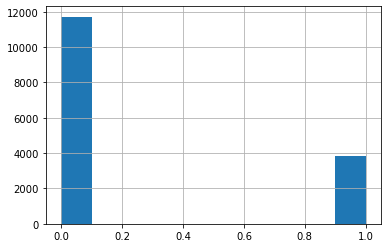

In [49]:
y_train.hist()

<AxesSubplot:>

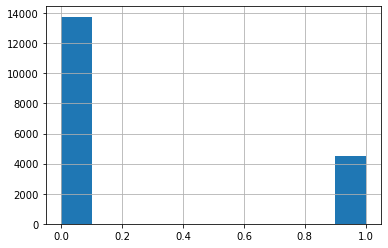

In [50]:
df["target"].hist()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

<AxesSubplot:>

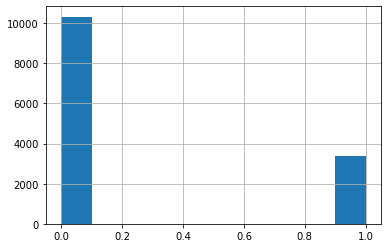

In [52]:
y_train.hist()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

<AxesSubplot:>

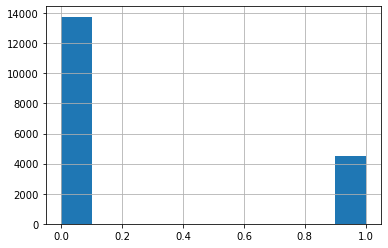

In [54]:
df["target"].hist()

<AxesSubplot:>

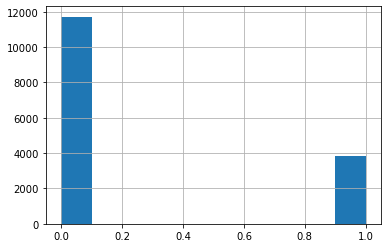

In [55]:
y_train.hist()

<AxesSubplot:>

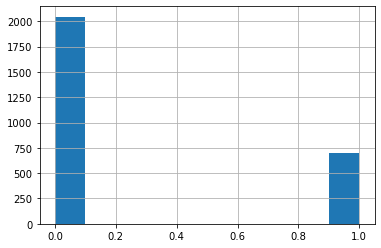

In [56]:
y_test.hist()

In [57]:
model = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(250, activation="relu"),
    Dense(125, activation="relu"),
    Dense(2, activation="softmax")
])

In [58]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_4 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 252       
Total params: 477,127
Trainable params: 477,127
Non-trainable params: 0
__________________________________________________

In [60]:
y_test.value_counts()

0.0    2045
1.0     697
Name: target, dtype: int64

In [61]:
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 18280, dtype: float64

In [62]:
history=model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
486/486 [==============================] - 2s 4ms/step - loss: 65.2489 - accuracy: 0.6291 - val_loss: 0.7052 - val_accuracy: 0.4664
Epoch 2/500
486/486 [==============================] - 2s 4ms/step - loss: 1.4145 - accuracy: 0.6716 - val_loss: 0.6289 - val_accuracy: 0.7385
Epoch 3/500
486/486 [==============================] - 2s 3ms/step - loss: 0.5954 - accuracy: 0.7464 - val_loss: 0.5675 - val_accuracy: 0.7458
Epoch 4/500
486/486 [==============================] - 2s 3ms/step - loss: 0.5802 - accuracy: 0.7461 - val_loss: 0.5675 - val_accuracy: 0.7458
Epoch 5/500
486/486 [==============================] - 2s 3ms/step - loss: 0.8460 - accuracy: 0.7216 - val_loss: 0.6023 - val_accuracy: 0.7130
Epoch 6/500
486/486 [==============================] - 2s 3ms/step - loss: 0.6530 - accuracy: 0.7431 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 7/500
486/486 [==============================] - 2s 3ms/step - loss: 0.5690 - accuracy: 0.7463 - val_loss: 0.5700 - val_accuracy: 0.745

Epoch 58/500
486/486 [==============================] - 3s 5ms/step - loss: 0.5576 - accuracy: 0.7543 - val_loss: 0.5669 - val_accuracy: 0.7458
Epoch 59/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5554 - accuracy: 0.7563 - val_loss: 0.5674 - val_accuracy: 0.7458
Epoch 60/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5586 - accuracy: 0.7534 - val_loss: 0.5673 - val_accuracy: 0.7458
Epoch 61/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5606 - accuracy: 0.7518 - val_loss: 0.5676 - val_accuracy: 0.7458
Epoch 62/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5586 - accuracy: 0.7536 - val_loss: 0.5675 - val_accuracy: 0.7458
Epoch 63/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5544 - accuracy: 0.7570 - val_loss: 0.5669 - val_accuracy: 0.7458
Epoch 64/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5509 - accuracy: 0.7603 - val_loss: 0.5670 - val_accuracy:

Epoch 115/500
486/486 [==============================] - 2s 3ms/step - loss: 0.5616 - accuracy: 0.7508 - val_loss: 0.5674 - val_accuracy: 0.7458
Epoch 116/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5556 - accuracy: 0.7561 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 117/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5613 - accuracy: 0.7510 - val_loss: 0.5674 - val_accuracy: 0.7458
Epoch 118/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5559 - accuracy: 0.7558 - val_loss: 0.5669 - val_accuracy: 0.7458
Epoch 119/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5541 - accuracy: 0.7575 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 120/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5540 - accuracy: 0.7575 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 121/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5557 - accuracy: 0.7561 - val_loss: 0.5669 - val_ac

486/486 [==============================] - 2s 4ms/step - loss: 0.5600 - accuracy: 0.7522 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 172/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5550 - accuracy: 0.7566 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 173/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5596 - accuracy: 0.7524 - val_loss: 0.5673 - val_accuracy: 0.7458
Epoch 174/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5598 - accuracy: 0.7523 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 175/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5600 - accuracy: 0.7521 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 176/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5598 - accuracy: 0.7524 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 177/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5587 - accuracy: 0.7533 - val_loss: 0.5672 - val_accuracy: 0.7458

486/486 [==============================] - 2s 4ms/step - loss: 0.5478 - accuracy: 0.7630 - val_loss: 0.5669 - val_accuracy: 0.7458
Epoch 228/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5636 - accuracy: 0.7488 - val_loss: 0.5673 - val_accuracy: 0.7458
Epoch 229/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5557 - accuracy: 0.7559 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 230/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5518 - accuracy: 0.7594 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 231/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5611 - accuracy: 0.7511 - val_loss: 0.5673 - val_accuracy: 0.7458
Epoch 232/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5607 - accuracy: 0.7516 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 233/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5634 - accuracy: 0.7491 - val_loss: 0.5673 - val_accuracy: 0.7458

486/486 [==============================] - 2s 4ms/step - loss: 0.5559 - accuracy: 0.7558 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 284/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5620 - accuracy: 0.7502 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 285/500
486/486 [==============================] - 3s 6ms/step - loss: 0.5524 - accuracy: 0.7589 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 286/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5540 - accuracy: 0.7574 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 287/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5549 - accuracy: 0.7568 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 288/500
486/486 [==============================] - 3s 6ms/step - loss: 0.5601 - accuracy: 0.7520 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 289/500
486/486 [==============================] - 3s 6ms/step - loss: 0.5551 - accuracy: 0.7565 - val_loss: 0.5670 - val_accuracy: 0.7458

486/486 [==============================] - 2s 4ms/step - loss: 0.5640 - accuracy: 0.7486 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 340/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5527 - accuracy: 0.7586 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 341/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5534 - accuracy: 0.7581 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 342/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5584 - accuracy: 0.7536 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 343/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5595 - accuracy: 0.7526 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 344/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5575 - accuracy: 0.7543 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 345/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5542 - accuracy: 0.7573 - val_loss: 0.5672 - val_accuracy: 0.7458

486/486 [==============================] - 2s 4ms/step - loss: 0.5582 - accuracy: 0.7538 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 396/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5575 - accuracy: 0.7543 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 397/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5611 - accuracy: 0.7511 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 398/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5547 - accuracy: 0.7568 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 399/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5556 - accuracy: 0.7561 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 400/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5533 - accuracy: 0.7581 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 401/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5575 - accuracy: 0.7543 - val_loss: 0.5670 - val_accuracy: 0.7458

486/486 [==============================] - 2s 4ms/step - loss: 0.5563 - accuracy: 0.7554 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 452/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5650 - accuracy: 0.7476 - val_loss: 0.5672 - val_accuracy: 0.7458
Epoch 453/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5646 - accuracy: 0.7480 - val_loss: 0.5673 - val_accuracy: 0.7458
Epoch 454/500
486/486 [==============================] - 2s 5ms/step - loss: 0.5626 - accuracy: 0.7498 - val_loss: 0.5673 - val_accuracy: 0.7458
Epoch 455/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5544 - accuracy: 0.7571 - val_loss: 0.5670 - val_accuracy: 0.7458
Epoch 456/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5596 - accuracy: 0.7525 - val_loss: 0.5671 - val_accuracy: 0.7458
Epoch 457/500
486/486 [==============================] - 2s 4ms/step - loss: 0.5568 - accuracy: 0.7550 - val_loss: 0.5670 - val_accuracy: 0.7458

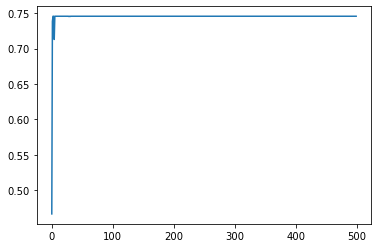

In [63]:
plt.plot(history.history["val_accuracy"])

In [64]:
np.max(history.history["val_accuracy"])

0.7458059787750244

In [66]:
X_scaler = StandardScaler().fit(X_train)

In [67]:
X_train_scaled=X_scaler.transform(X_train)

In [68]:
X_test_scaled=X_scaler.transform(X_test)

In [69]:
model2 = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(250, activation="relu"),
    Dense(125, activation="relu"),
    Dense(2, activation="softmax")
])

In [70]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [71]:
history2=model2.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test))

Epoch 1/500
486/486 [==============================] - 2s 4ms/step - loss: 0.4914 - accuracy: 0.7629 - val_loss: 0.4585 - val_accuracy: 0.7768
Epoch 2/500
486/486 [==============================] - 2s 3ms/step - loss: 0.4551 - accuracy: 0.7901 - val_loss: 0.4520 - val_accuracy: 0.7947
Epoch 3/500
486/486 [==============================] - 2s 3ms/step - loss: 0.4516 - accuracy: 0.7856 - val_loss: 0.4474 - val_accuracy: 0.7859
Epoch 4/500
486/486 [==============================] - 2s 3ms/step - loss: 0.4395 - accuracy: 0.7987 - val_loss: 0.4346 - val_accuracy: 0.7947
Epoch 5/500
486/486 [==============================] - 2s 3ms/step - loss: 0.4348 - accuracy: 0.7985 - val_loss: 0.4432 - val_accuracy: 0.7929
Epoch 6/500
486/486 [==============================] - 2s 3ms/step - loss: 0.4438 - accuracy: 0.7923 - val_loss: 0.4442 - val_accuracy: 0.7899
Epoch 7/500
486/486 [==============================] - 2s 3ms/step - loss: 0.4248 - accuracy: 0.8094 - val_loss: 0.4362 - val_accuracy: 0.7965

Epoch 58/500
486/486 [==============================] - 2s 4ms/step - loss: 0.1244 - accuracy: 0.9454 - val_loss: 1.4546 - val_accuracy: 0.7582
Epoch 59/500
486/486 [==============================] - 2s 4ms/step - loss: 0.1179 - accuracy: 0.9491 - val_loss: 1.3175 - val_accuracy: 0.7440
Epoch 60/500
486/486 [==============================] - 2s 4ms/step - loss: 0.1184 - accuracy: 0.9503 - val_loss: 1.3133 - val_accuracy: 0.7414
Epoch 61/500
486/486 [==============================] - 2s 4ms/step - loss: 0.1141 - accuracy: 0.9550 - val_loss: 1.4293 - val_accuracy: 0.7465
Epoch 62/500
486/486 [==============================] - 2s 4ms/step - loss: 0.1061 - accuracy: 0.9543 - val_loss: 1.5062 - val_accuracy: 0.7480
Epoch 63/500
486/486 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9559 - val_loss: 1.5644 - val_accuracy: 0.7502
Epoch 64/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0995 - accuracy: 0.9576 - val_loss: 1.3099 - val_accuracy:

Epoch 115/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0517 - accuracy: 0.9806 - val_loss: 1.9406 - val_accuracy: 0.7418
Epoch 116/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0428 - accuracy: 0.9836 - val_loss: 2.0008 - val_accuracy: 0.7301
Epoch 117/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0521 - accuracy: 0.9818 - val_loss: 1.9068 - val_accuracy: 0.7352
Epoch 118/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0468 - accuracy: 0.9820 - val_loss: 2.2541 - val_accuracy: 0.7367
Epoch 119/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0576 - accuracy: 0.9777 - val_loss: 1.9498 - val_accuracy: 0.7487
Epoch 120/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0522 - accuracy: 0.9802 - val_loss: 1.8729 - val_accuracy: 0.7498
Epoch 121/500
486/486 [==============================] - 2s 3ms/step - loss: 0.0423 - accuracy: 0.9841 - val_loss: 1.8975 - val_ac

486/486 [==============================] - 2s 4ms/step - loss: 0.0265 - accuracy: 0.9907 - val_loss: 2.5110 - val_accuracy: 0.7367
Epoch 172/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0293 - accuracy: 0.9891 - val_loss: 2.2296 - val_accuracy: 0.7429
Epoch 173/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0354 - accuracy: 0.9870 - val_loss: 2.1907 - val_accuracy: 0.7538
Epoch 174/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9908 - val_loss: 2.1035 - val_accuracy: 0.7429
Epoch 175/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0341 - accuracy: 0.9877 - val_loss: 2.2363 - val_accuracy: 0.7400
Epoch 176/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 2.0394 - val_accuracy: 0.7440
Epoch 177/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0332 - accuracy: 0.9892 - val_loss: 2.1941 - val_accuracy: 0.7396

486/486 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9943 - val_loss: 3.1263 - val_accuracy: 0.7392
Epoch 228/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 2.5050 - val_accuracy: 0.7400
Epoch 229/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 2.5529 - val_accuracy: 0.7334
Epoch 230/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 2.6914 - val_accuracy: 0.7228
Epoch 231/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 2.4637 - val_accuracy: 0.7352
Epoch 232/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0288 - accuracy: 0.9917 - val_loss: 2.6436 - val_accuracy: 0.7378
Epoch 233/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 2.4565 - val_accuracy: 0.7356

486/486 [==============================] - 2s 4ms/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 3.1107 - val_accuracy: 0.7349
Epoch 284/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 2.5609 - val_accuracy: 0.7363
Epoch 285/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 3.0345 - val_accuracy: 0.7422
Epoch 286/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.9951 - val_loss: 2.4357 - val_accuracy: 0.7385
Epoch 287/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9937 - val_loss: 2.2512 - val_accuracy: 0.7338
Epoch 288/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0171 - accuracy: 0.9939 - val_loss: 2.4271 - val_accuracy: 0.7498
Epoch 289/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 3.2946 - val_accuracy: 0.7429

486/486 [==============================] - 2s 4ms/step - loss: 0.0218 - accuracy: 0.9942 - val_loss: 2.9385 - val_accuracy: 0.7247
Epoch 340/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 3.4062 - val_accuracy: 0.7283
Epoch 341/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 3.1380 - val_accuracy: 0.7381
Epoch 342/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 3.9044 - val_accuracy: 0.7356
Epoch 343/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 4.2377 - val_accuracy: 0.7389
Epoch 344/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9912 - val_loss: 3.2957 - val_accuracy: 0.7414
Epoch 345/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0213 - accuracy: 0.9948 - val_loss: 2.5611 - val_accuracy: 0.7407

486/486 [==============================] - 2s 4ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 4.1624 - val_accuracy: 0.7473
Epoch 396/500
486/486 [==============================] - 2s 5ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 3.8160 - val_accuracy: 0.7498
Epoch 397/500
486/486 [==============================] - 3s 5ms/step - loss: 0.0185 - accuracy: 0.9948 - val_loss: 3.9288 - val_accuracy: 0.7356
Epoch 398/500
486/486 [==============================] - 3s 7ms/step - loss: 0.0138 - accuracy: 0.9951 - val_loss: 4.1225 - val_accuracy: 0.7374
Epoch 399/500
486/486 [==============================] - 3s 6ms/step - loss: 0.0263 - accuracy: 0.9938 - val_loss: 3.1665 - val_accuracy: 0.7334
Epoch 400/500
486/486 [==============================] - 3s 6ms/step - loss: 0.0175 - accuracy: 0.9934 - val_loss: 3.8127 - val_accuracy: 0.7396
Epoch 401/500
486/486 [==============================] - 3s 6ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 3.6367 - val_accuracy: 0.7392

486/486 [==============================] - 2s 4ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 4.2112 - val_accuracy: 0.7396
Epoch 452/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 3.5682 - val_accuracy: 0.7385
Epoch 453/500
486/486 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9944 - val_loss: 2.9683 - val_accuracy: 0.7323
Epoch 454/500
486/486 [==============================] - 3s 5ms/step - loss: 0.1388 - accuracy: 0.9888 - val_loss: 3.1478 - val_accuracy: 0.7381
Epoch 455/500
486/486 [==============================] - 3s 6ms/step - loss: 0.0240 - accuracy: 0.9937 - val_loss: 4.1025 - val_accuracy: 0.7345
Epoch 456/500
486/486 [==============================] - 2s 5ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 4.2314 - val_accuracy: 0.7422
Epoch 457/500
486/486 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 4.0413 - val_accuracy: 0.7301

In [72]:
plt.plot(history2.history2["val_accuracy"])

AttributeError: 'History' object has no attribute 'history2'

In [73]:
np.max(history2.history["val_accuracy"])

0.7964988946914673

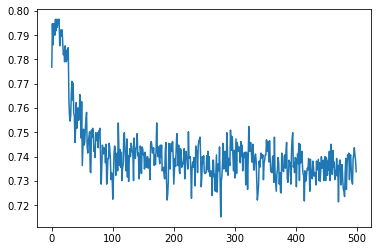

In [74]:
plt.plot(history2.history["val_accuracy"])

In [86]:
model3 = Sequential([
    Input(shape=X_train.shape[1]),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(250, activation="relu"),
    Dense(125, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [87]:
model3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["binary_accuracy"])

In [88]:
history3=model3.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
486/486 [==============================] - 2s 4ms/step - loss: 47.0910 - binary_accuracy: 0.6222 - val_loss: 0.6875 - val_binary_accuracy: 0.7462
Epoch 2/100
486/486 [==============================] - 2s 3ms/step - loss: 0.7106 - binary_accuracy: 0.7086 - val_loss: 0.6328 - val_binary_accuracy: 0.7458
Epoch 3/100
486/486 [==============================] - 2s 3ms/step - loss: 0.6050 - binary_accuracy: 0.7432 - val_loss: 0.5801 - val_binary_accuracy: 0.7458
Epoch 4/100
486/486 [==============================] - 2s 3ms/step - loss: 0.5648 - binary_accuracy: 0.7508 - val_loss: 0.6137 - val_binary_accuracy: 0.7458
Epoch 5/100
486/486 [==============================] - 2s 3ms/step - loss: 0.5684 - binary_accuracy: 0.7497 - val_loss: 0.5686 - val_binary_accuracy: 0.7458
Epoch 6/100
486/486 [==============================] - 1s 3ms/step - loss: 0.7307 - binary_accuracy: 0.7480 - val_loss: 8.2950 - val_binary_accuracy: 0.2739
Epoch 7/100
486/486 [==============================] - 2s

Epoch 53/100
486/486 [==============================] - 2s 4ms/step - loss: 0.5622 - binary_accuracy: 0.7487 - val_loss: 0.5699 - val_binary_accuracy: 0.7458
Epoch 54/100
486/486 [==============================] - 2s 4ms/step - loss: 0.5581 - binary_accuracy: 0.7534 - val_loss: 0.5667 - val_binary_accuracy: 0.7458
Epoch 55/100
486/486 [==============================] - 3s 5ms/step - loss: 0.5564 - binary_accuracy: 0.7536 - val_loss: 0.5663 - val_binary_accuracy: 0.7458
Epoch 56/100
486/486 [==============================] - 3s 5ms/step - loss: 0.5548 - binary_accuracy: 0.7556 - val_loss: 0.5670 - val_binary_accuracy: 0.7458
Epoch 57/100
486/486 [==============================] - 3s 5ms/step - loss: 0.5581 - binary_accuracy: 0.7521 - val_loss: 0.5672 - val_binary_accuracy: 0.7458
Epoch 58/100
486/486 [==============================] - 2s 4ms/step - loss: 0.5577 - binary_accuracy: 0.7527 - val_loss: 0.5682 - val_binary_accuracy: 0.7458
Epoch 59/100
486/486 [==============================

In [90]:
np.max(history3.history["binary_accuracy"])

0.7543441653251648

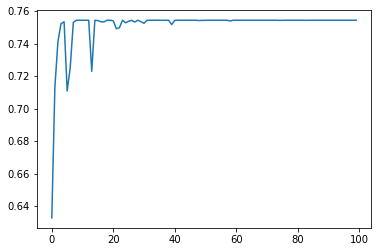

In [91]:
plt.plot(history3.history["binary_accuracy"])

Best Validation Loss: 0.5665
Best Validation Accuracy: 0.7458


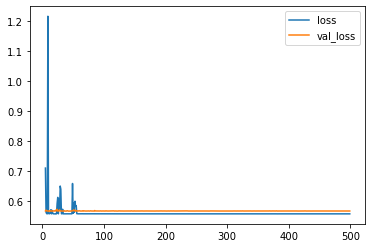

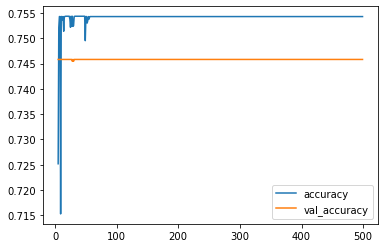

In [92]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

Best Validation Loss: 0.4346
Best Validation Accuracy: 0.7965


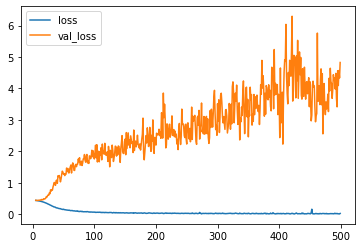

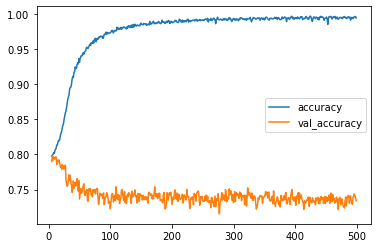

In [93]:
history_df = pd.DataFrame(history2.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

Best Validation Loss: 0.5657
Best Validation Accuracy: 0.7462


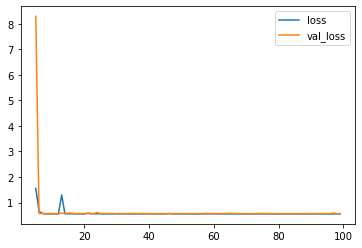

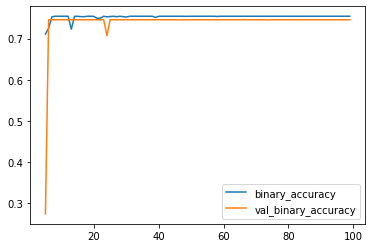

In [94]:
history_df = pd.DataFrame(history3.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [95]:
np.max(history.history["val_accuracy"])

0.7458059787750244

In [96]:
np.max(history2.history["val_accuracy"])

0.7964988946914673

In [97]:
np.max(history3.history["val_accuracy"])

KeyError: 'val_accuracy'